In [67]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [68]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])        

In [70]:
print(df.to_string())

     Survived  Pclass     Sex    Age  SibSp  Parch      Fare Embarked
0           0       3    male  22.00      1      0    7.2500        S
1           1       1  female  38.00      1      0   71.2833        C
2           1       3  female  26.00      0      0    7.9250        S
3           1       1  female  35.00      1      0   53.1000        S
4           0       3    male  35.00      0      0    8.0500        S
5           0       3    male    NaN      0      0    8.4583        Q
6           0       1    male  54.00      0      0   51.8625        S
7           0       3    male   2.00      3      1   21.0750        S
8           1       3  female  27.00      0      2   11.1333        S
9           1       2  female  14.00      1      0   30.0708        C
10          1       3  female   4.00      1      1   16.7000        S
11          1       1  female  58.00      0      0   26.5500        S
12          0       3    male  20.00      0      0    8.0500        S
13          0       

In [71]:
df['Age'].fillna(0,inplace=True)


In [72]:
newdf1=df[['Survived','Pclass','Age','SibSp','Fare']]
newdf1.corr()

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,0.010539,-0.035322,0.257307
Pclass,-0.338481,1.000000,-0.361353,0.083081,-0.549500
Age,0.010539,-0.361353,1.000000,-0.184664,0.135516
SibSp,-0.035322,0.083081,-0.184664,1.000000,0.159651
Fare,0.257307,-0.549500,0.135516,0.159651,1.000000


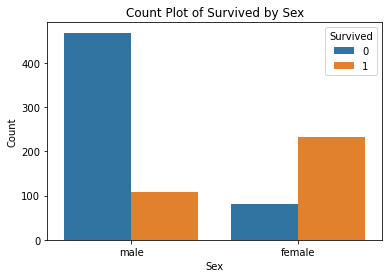

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count Plot of Survived by Sex')
plt.show()


In [74]:
newdf2=df[['Survived','Age']]
print(newdf2.corr())

          Survived       Age
Survived  1.000000  0.010539
Age       0.010539  1.000000


<AxesSubplot:xlabel='Survived'>

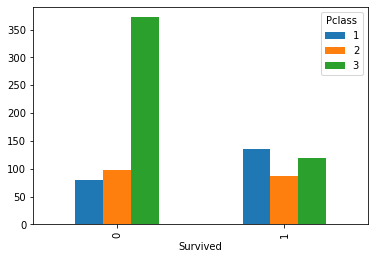

In [115]:
pd.crosstab(df['Survived'],df['Pclass']).plot(kind='bar')

<AxesSubplot:xlabel='Survived'>

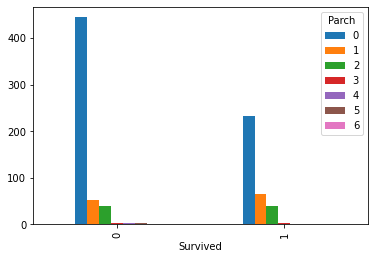

In [76]:
pd.crosstab(df['Survived'],df['Parch']).plot(kind='bar')

<AxesSubplot:xlabel='Survived'>

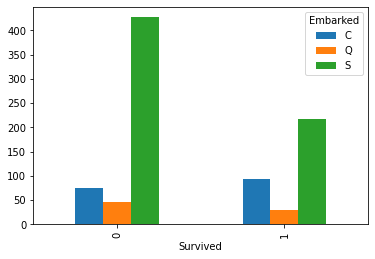

In [77]:
pd.crosstab(df['Survived'],df['Embarked']).plot(kind='bar')

In [91]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,0.0,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [119]:
df['Embarked']=df['Embarked'].fillna(0)
x=df[['Pclass','Parch','Sex','Embarked','SibSp']]
y=df['Survived']

In [127]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [110]:
x_train.isnull().sum()

Pclass      0
Parch       0
Sex         0
Embarked    0
dtype: int64

In [99]:
y_train.isnull().sum()

0

In [128]:

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [129]:
ans=model.predict([[0,1,1,0,1]])
print(ans)

[1]


In [130]:
model.score(x_test,y_test)

0.8268156424581006

<AxesSubplot:xlabel='Survived'>

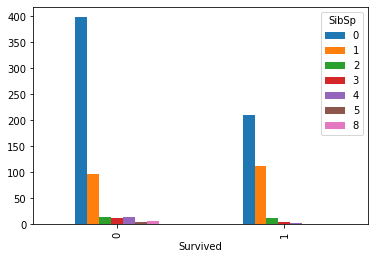

In [118]:
pd.crosstab(df['Survived'],df['SibSp']).plot(kind='bar')